Simon's algorithm was the first quantum algorithm to show an exponential speed-up versus the best classical algorithm in solving a specific problem. This inspired the quantum algorithm for the discrete Fourier transform, also known as quantum Fourier transform, which is used in the most famous quantum algorithm: Shor's factoring algorithm.

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

Hidden binary number `s` to be found by the Simon's Algorithm.

In [9]:
s = '110'

In [10]:
# Creating registers
# qubits for querying the oracle and finding the hidden period s
qr = QuantumRegister(2*len(str(s)))
# classical registers for recording the measurement on qr
cr = ClassicalRegister(2*len(str(s)))

simonCircuit = QuantumCircuit(qr, cr)
barriers = True

# Apply Hadamard gates before querying the oracle
for i in range(len(str(s))):
    simonCircuit.h(qr[i])    

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply the inner-product oracle 
if s == '11':
## 2-qubit oracle for s = 11
    simonCircuit.cx(qr[0], qr[len(str(s)) + 0])
    simonCircuit.cx(qr[0], qr[len(str(s)) + 1])
    simonCircuit.cx(qr[1], qr[len(str(s)) + 0])
    simonCircuit.cx(qr[1], qr[len(str(s)) + 1])  
elif s == '110':
## 3-qubit oracle for s = 110
    simonCircuit.cx(qr[2], qr[4])  
    simonCircuit.x(qr[3])  
    simonCircuit.cx(qr[2], qr[3])  
    simonCircuit.ccx(qr[0], qr[1], qr[3])  
    simonCircuit.x(qr[0])  
    simonCircuit.x(qr[1])  
    simonCircuit.ccx(qr[0], qr[1], qr[3])  
    simonCircuit.x(qr[0])  
    simonCircuit.x(qr[1])  
    simonCircuit.x(qr[3])

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Measure ancilla qubits
for i in range(len(str(s)), 2*len(str(s))):
    simonCircuit.measure(qr[i], cr[i])

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply Hadamard gates to the input register
for i in range(len(str(s))):
    simonCircuit.h(qr[i])

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Measure input register
for i in range(len(str(s))):
    simonCircuit.measure(qr[i], cr[i])

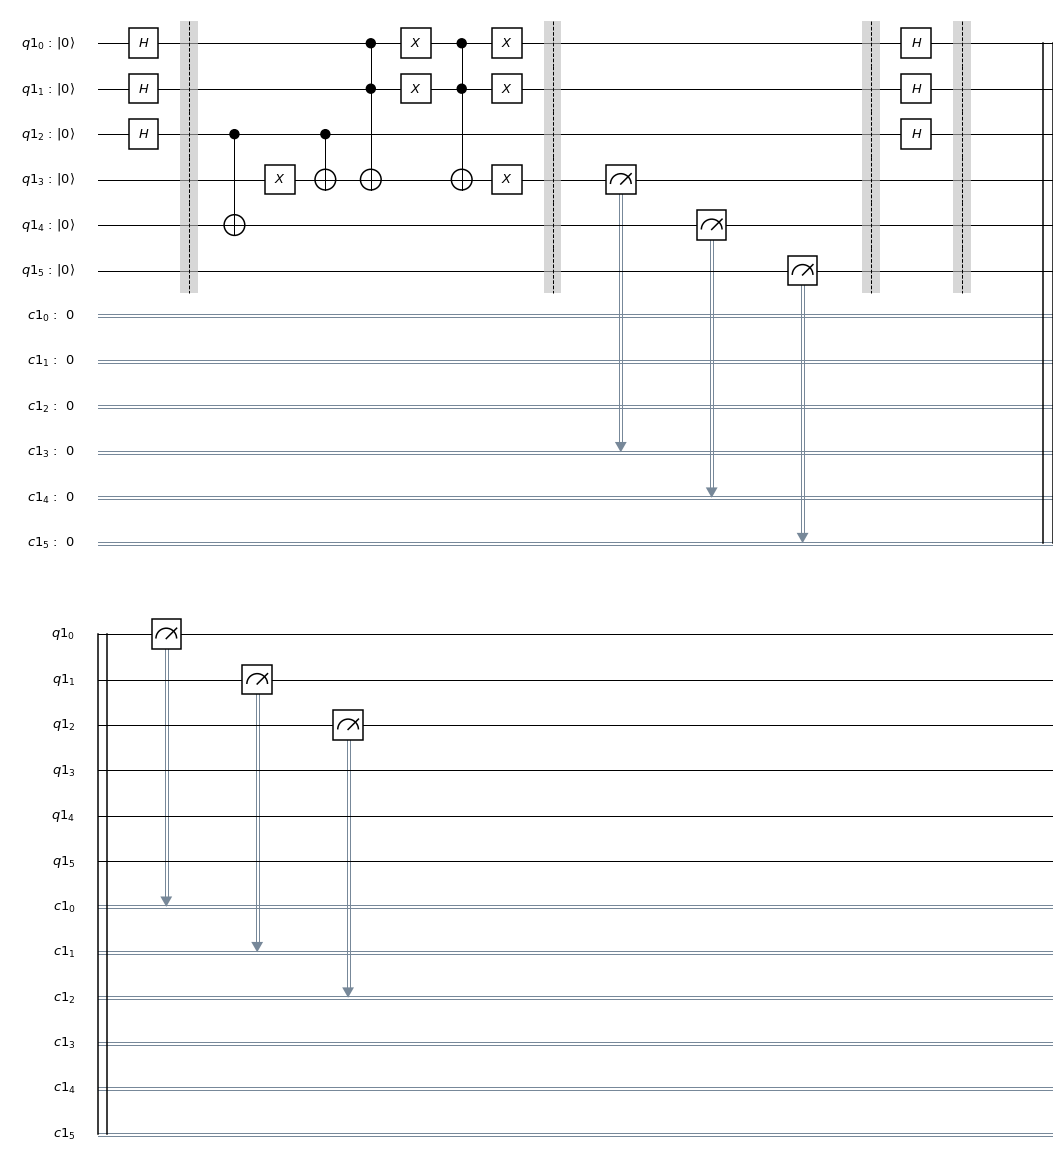

In [11]:
simonCircuit.draw(output='mpl')

{'010011': 68, '011100': 70, '010111': 82, '010000': 60, '001000': 52, '000000': 67, '000111': 85, '001111': 50, '001100': 54, '010100': 55, '001011': 71, '011011': 54, '011111': 69, '000100': 62, '000011': 72, '011000': 53}
{'011': 265, '100': 241, '111': 286, '000': 232}


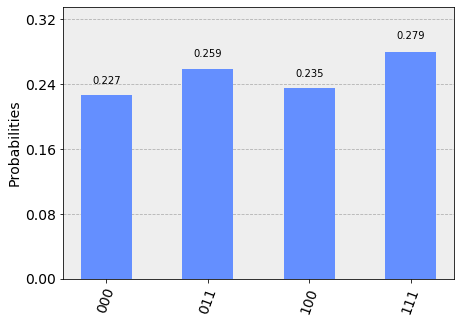

In [12]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simonCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)

# categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

function sdotz : Takes in two numbers and returns their dot product modulo 2.

Using these results, we can recover the value of `s`.

In [14]:
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
110, 110, 110.110=0
110, 001, 110.001=0
110, 111, 110.111=0
110, 000, 110.000=0
